# Exploring the data

#### Notes:
 1. There are 4459 different potential costumers/ rows of data
 2. There are 4993 different types of transactions/ columns of data
 3. There are no null values in the data
 4. 

In [1]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score


In [2]:
# there are 4459 potential customers (rows) with 4993 different transactions (columns)

train = pd.read_csv('data/santander-value-prediction-challenge/train.csv')
print(train.shape)
train.head()

(4459, 4993)


,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [3]:
# check to see if any columns have the `object` datatype

train.columns[train.dtypes == 'object']

Index(['ID'], dtype='object')

In [4]:
# there are no null values in this dataset

(train.isnull().sum() != 0).sum()

0

## Now, since there are so many columns, we will do Principal Component Analysis to reduce the number of columns before making predictions.

As taken from [8.04-lesson-principal_component_analysis](https://git.generalassemb.ly/DSI-US-7/8.04-lesson-principal_component_analysis/blob/master/starter-code-ec.ipynb)
### Two notes:

1. You will do your train/test split **before** applying PCA!
2. Standardize our data **before** applying PCA!

In [5]:
# separate the data into features and target variables

features = [col for col in train.columns if col != 'target']
X = train[features]
y = train['target']
print(train.shape)
print(X.shape)
print(y.shape)

(4459, 4993)
(4459, 4992)
(4459,)


In [6]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [7]:
X_train.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
1739,65ada8db2,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
981,38a920299,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1983,7325a68d6,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1698,626948f18,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3678,d345ae5dd,0.0,0,0.0,0,0,0,0,0,39400000.0,...,0.0,0.0,100000.0,0,0,0,0,0,0,0


In [13]:
# Instantiate a standard scale
ss = StandardScaler()

# fit and scale X_train
numerical_features = [col for col in X_train if col != 'ID']
X_train_num = X_train[numerical_features]
Xs_train = ss.fit_transform(X_train_num)

# # scale X_test
X_test_num = X_test[numerical_features]
Xs_test = ss.transform(X_test_num)

/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [14]:
Xs_train

array([[-0.04347695, -0.01839178, -0.04942478, ..., -0.06793597,
        -0.05715432, -0.12777777],
       [-0.04347695, -0.01839178, -0.04942478, ..., -0.06793597,
        -0.05715432, -0.12777777],
       [-0.04347695, -0.01839178, -0.04942478, ..., -0.06793597,
        -0.05715432, -0.12777777],
       ...,
       [-0.04347695, -0.01839178, -0.04942478, ..., -0.06793597,
        -0.05715432, -0.12777777],
       [-0.04347695, -0.01839178, -0.04942478, ..., -0.06793597,
        -0.05715432, -0.12777777],
       [-0.04347695, -0.01839178, -0.04942478, ..., -0.06793597,
        -0.05715432, -0.12777777]])

In [15]:
Xs_test

array([[-0.04347695, -0.01839178, -0.04942478, ..., -0.06793597,
        -0.05715432, -0.12777777],
       [-0.04347695, -0.01839178, -0.04942478, ..., -0.06793597,
        -0.05715432, -0.12777777],
       [-0.04347695, -0.01839178, -0.04942478, ..., -0.06793597,
        -0.05715432, -0.12777777],
       ...,
       [-0.04347695, -0.01839178, -0.04942478, ..., -0.06793597,
        -0.05715432, -0.12777777],
       [-0.04347695, -0.01839178, -0.04942478, ..., -0.06793597,
        -0.05715432, -0.12777777],
       [-0.04347695, -0.01839178, -0.04942478, ..., -0.06793597,
        -0.05715432, -0.12777777]])

In [16]:
# len(Xs_train_num)

In [17]:
# # dataframe of the training data
# Xs_train_df = pd.DataFrame(Xs_train_num)
# Xs_train_df.head(25)

In [18]:
# Instantiate PCA
pca = PCA()

In [ ]:
# fit the pca to the training data
pca.fit(Xs_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
Z_train = pca.transform(Xs_train)

In [ ]:
pd.DataFrame(Z_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986
count,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,...,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03,2.987000e+03
mean,-1.269676e-16,3.528522e-16,2.834470e-16,-8.466984e-17,2.497723e-17,1.558103e-16,-2.308164e-17,6.088200e-17,1.465554e-16,-1.004850e-16,...,-4.042553e-17,6.860121e-17,-1.204607e-17,4.303029e-17,-1.981143e-17,3.202349e-17,-1.393321e-17,3.593980e-17,2.199550e-17,3.578709e-17
std,1.087453e+01,1.006500e+01,8.867700e+00,7.669539e+00,6.374179e+00,5.996391e+00,5.539177e+00,5.426956e+00,5.253698e+00,4.661825e+00,...,1.556123e-05,5.678591e-06,4.549417e-06,2.909287e-06,1.190637e-06,1.866545e-14,4.189178e-15,3.407180e-15,3.103067e-15,3.431403e-15
min,-6.381358e+00,-4.870642e+01,-1.520046e+01,-4.307392e+01,-4.831634e+01,-1.432711e+01,-4.567391e+01,-2.339385e+01,-3.272204e+01,-1.161588e+01,...,-1.708050e-04,-1.493337e-04,-9.956393e-05,-5.310230e-05,-1.749617e-05,-5.698584e-13,-2.628973e-14,-2.401725e-14,-2.217670e-14,-2.153833e-14
25%,-4.657362e+00,-1.094643e+00,-9.479115e-01,-1.292864e+00,-9.788385e-01,-1.097661e+00,-5.128252e-01,-7.511255e-01,-1.626504e-01,-3.894891e-01,...,-5.915949e-10,-1.216332e-10,-8.275265e-11,-2.218041e-11,-4.271439e-12,-2.048708e-15,-2.096413e-15,-1.831868e-15,-1.616762e-15,-1.608956e-15
50%,-3.543189e+00,-7.980402e-01,-8.700409e-01,-1.110013e+00,-6.505634e-01,-8.059964e-01,-3.734003e-01,-6.705840e-01,2.898704e-01,-3.198987e-01,...,1.447323e-13,4.500927e-13,-5.509482e-14,9.756432e-14,2.205180e-14,6.661338e-16,1.179612e-16,3.642919e-17,2.775558e-17,-3.642919e-17
75%,-6.434608e-01,4.261398e-01,-3.934991e-01,-1.435600e-01,-4.449654e-01,1.528561e-01,3.768735e-01,-3.873329e-01,5.172730e-01,-8.137735e-02,...,5.533304e-10,1.238545e-10,7.267581e-11,2.167770e-11,4.197059e-12,4.782633e-15,2.088607e-15,1.834470e-15,1.720412e-15,1.711305e-15
max,8.584938e+01,1.045632e+02,2.053160e+02,1.117821e+02,8.720800e+01,1.577194e+02,7.413680e+01,9.821171e+01,5.882969e+01,1.515635e+02,...,7.723450e-04,2.633266e-04,1.936162e-04,1.291781e-04,5.382041e-05,6.913914e-14,2.206221e-14,2.690209e-14,1.551537e-14,3.195534e-14


In [ ]:
Z_test = pca.transform(Xs_test)

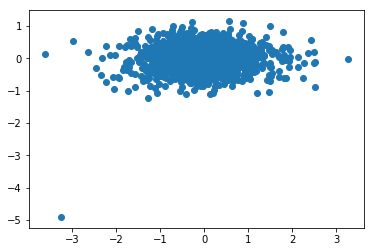

In [ ]:
plt.scatter(pd.DataFrame(Z_train[0]),
            pd.DataFrame(Z_train[1]))

In [ ]:
Z_train.shape

(2987, 2987)

In [ ]:
Z_test.shape

(1472, 2987)

In [ ]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance: {var_exp}')

cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance: {cum_var_exp}')

Explained variance: [2.55989087e-02 2.19294591e-02 1.70224740e-02 ... 4.27406027e-34
 1.38069465e-34 4.46020317e-35]
Cumulative explained variance: [0.02559891 0.04752837 0.06455084 ... 1.         1.         1.        ]


In [ ]:
list(cum_var_exp).index(0.025598908656234598)

0

In [ ]:
# determine the number of Z variables to take in order to capture 80% of the variance in the data
index = []
j = 0
for i in list(cum_var_exp):
    if i > 0.8:
        index.append(list(cum_var_exp).index(i))
print(index[0])
    

634


In [ ]:
# checking the cumulative variance of the first 635 Z variables
cum_var_exp[634]

0.8002372850517695

In [ ]:
# No principal components used
# Instantiate linear regression model.
lm = LinearRegression()

# Fit on X_train.
lm.fit(Xs_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(r2_score(lm.predict(Xs_train), y_train),4)}.')
print(f'Testing Score: {round(r2_score(lm.predict(Xs_test), y_test),4)}.')

Training Score: 0.9993.
Testing Score: -0.0038.


In [ ]:
# principal components used
# Instantiate linear regression model.
lm = LinearRegression()

# Transform Z_train and Z_test.
Z_train = pca.transform(Xs_train)
Z_test = pca.transform(Xs_test)

# Fit on Z_train.
lm.fit(Z_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(r2_score(lm.predict(Z_train), y_train),4)}.')
print(f'Testing Score: {round(r2_score(lm.predict(Z_test), y_test),4)}.')

Training Score: 0.9993.
Testing Score: -0.0001.


In [ ]:
# # listing the eigenvalues for the first 635 Z variables, which are the transformations of the initial features
# # using the principle component directions.
# for i in range(635):
#     print(var_exp[i])

#### The following script is taken from the notebook on PCA
[8.04-lesson-principal_component_analysis/starter-code.ipynb](https://git.generalassemb.ly/DSI-US-7/8.04-lesson-principal_component_analysis/blob/master/starter-code-ec.ipynb) 

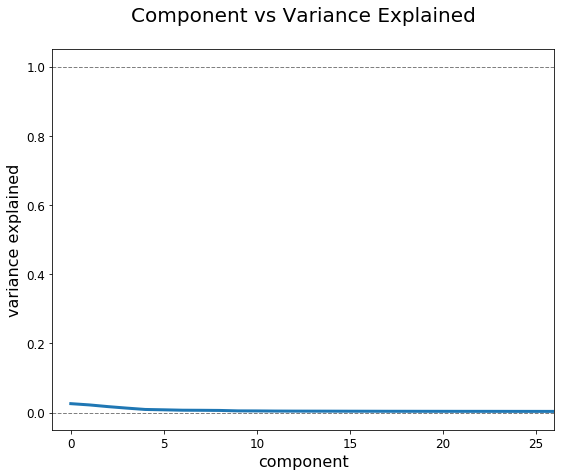

In [ ]:
plt.figure(figsize=(9,7))

# Plot the explained variance
component_number = range(len(var_exp))
plt.plot(component_number, var_exp, lw=3)

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Variance Explained\n', fontsize=20)

plt.show()

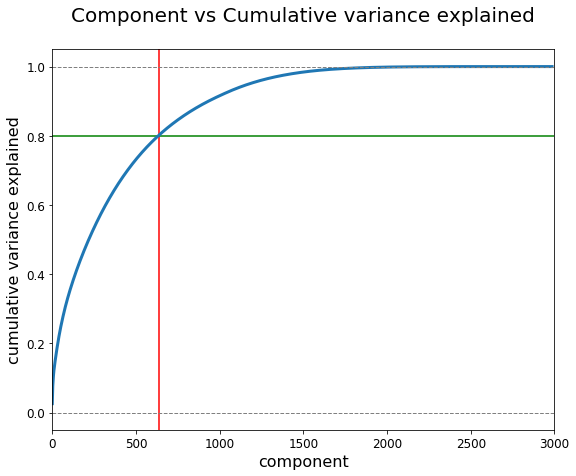

In [ ]:
plt.figure(figsize=(9,7))

# Plot the cumulative explained variance
component_number = range(len(cum_var_exp))
plt.plot(component_number, cum_var_exp, lw=3)
plt.vlines(x = 635, colors='r', ymin=-0.5, ymax=1.5)
plt.hlines(y = 0.8, colors='g', xmin=-0.5, xmax=3000)

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-0.5,3000])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Cumulative variance explained\n', fontsize=20)

plt.show()

In [ ]:
# now, we fit a model and make predictions using the 635 features

pca1 = PCA(n_components=643)
pca1.fit(Xs_train)

PCA(copy=True, iterated_power='auto', n_components=643, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
var_exp_1 = pca1.explained_variance_ratio_
print(f'Explained variance: {var_exp_1}')

cum_var_exp_1 = np.cumsum(var_exp_1)
print(f'Cumulative explained variance: {cum_var_exp_1}')

Explained variance: [0.02559891 0.02192946 0.01702247 0.01273325 0.00879527 0.0077836
 0.00664188 0.00637549 0.0059749  0.00470449 0.00456181 0.00417324
 0.00401027 0.00392937 0.00385408 0.00374064 0.00365376 0.00355744
 0.00350589 0.00345424 0.00340453 0.00336    0.00333921 0.003305
 0.00326411 0.00323257 0.00318112 0.00315333 0.00311003 0.00307609
 0.0030613  0.00304594 0.00299995 0.00298284 0.00290905 0.00288892
 0.00286244 0.00284578 0.00281038 0.00274427 0.00273599 0.00270035
 0.00266926 0.00261961 0.00261187 0.00257113 0.00255573 0.00250037
 0.00247197 0.00244979 0.00242619 0.00238274 0.002357   0.00233561
 0.0023201  0.00229941 0.00227408 0.00226904 0.00223732 0.00222449
 0.00219679 0.00218094 0.00216153 0.00215487 0.00212615 0.00211484
 0.00210182 0.00209566 0.00208426 0.00206062 0.00204928 0.00203378
 0.0019978  0.0019963  0.00198703 0.00196853 0.0019465  0.00193317
 0.00190691 0.00188237 0.00185697 0.00185371 0.0018434  0.00182117
 0.00181092 0.00179632 0.00178234 0.00177649 

In [ ]:
# Instantiate linear regression model.
lm = LinearRegression()

# Fit on X_train.
lm.fit(Xs_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(r2_score(lm.predict(Xs_train), y_train),4)}.')
print(f'Testing Score: {round(r2_score(lm.predict(Xs_test), y_test),4)}.')

Training Score: 0.9993.
Testing Score: -0.0038.


In [ ]:
# Instantiate linear regression model.
lm = LinearRegression()

# Transform Z_train and Z_test.
Z_train = pca.transform(Xs_train)
Z_test = pca.transform(Xs_test)

# Fit on Z_train.
lm.fit(Z_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(r2_score(lm.predict(Z_train), y_train),4)}.')
print(f'Testing Score: {round(r2_score(lm.predict(Z_test), y_test),4)}.')

Training Score: 0.9993.
Testing Score: -0.0001.


## A correlation first approach

In [ ]:
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [ ]:
corr = train.corr()
corr_sort = corr.sort_values(by = ['target'], axis = 0, ascending=False)
corr_sort
sns.heatmap(corr_sort[['target']], annot=True, cmap='coolwarm')

In [ ]:
sns.heatmap(corr_sort[['target']], annot=True, cmap='coolwarm')

In [ ]:
corr_sort.head()

In [ ]:
sns.heatmap(corr_sort[['target']].head(20), annot=True, cmap='coolwarm')

In [ ]:
len(corr_sort)

In [ ]:
corr_sort[['target']].isnull().sum()

In [ ]:
corr_sort[['target']].notnull().sum()

In [ ]:
corr_sort[['target']].dropna().shape

In [ ]:
corr_sort[['target']].dropna().tail()

In [ ]:
corr_sort[['target']].T.columns

In [ ]:
corr_sort[['target']].T.columns[2]

In [ ]:
corr_sort[['target']].head()

In [ ]:
corr_sort[['target']].loc[corr_sort[['target']].T.columns[1]]

In [ ]:
corr_sort[['target']].loc['555f18bd3'].values


In [ ]:
# [col for col in corr_sort[['target']].T.columns]# if corr_sort[['target']].loc[col] >= 0.2]

value
features_of_interest = []
for col in corr_sort[['target']].T.columns:
    if corr_sort[['target']].loc[col].values > 0.2:
        features_of_interest.append(col)

features_of_interest


In [ ]:
len(features_of_interest)

In [ ]:
training_of_interest = train[features_of_interest]

In [ ]:
training_of_interest.shape

In [ ]:
train[['ID']]

In [ ]:
# this will be the first set we train a model on.
training = pd.concat([train['ID'], training_of_interest], axis=1)

## Model with the data

In [ ]:
features = [col for col in training.columns if col != 'target']
X = training[features]
y = training['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.33,
                                                    random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
print(X_test.shape)
print(y_test.shape)

In [ ]:
# Instantiate a standard scale
ss = StandardScaler()

# fit and scale X_train
numerical_features = [col for col in X_train if col != 'ID']
X_train_num = X_train[numerical_features]
Xs_train = ss.fit_transform(X_train_num)

# # scale X_test
X_test_num = X_test[numerical_features]
Xs_test = ss.transform(X_test_num)

In [ ]:
# df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
train_df_scaled = pd.DataFrame(Xs_train, columns = X_train_num.columns)

In [ ]:
train_df_scaled.head()

In [ ]:
# Instantiate linear regression model.
lm = LinearRegression()

# Fit on Xs_train.
lm.fit(Xs_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(r2_score(lm.predict(Xs_train), y_train),4)}.')
print(f'Testing Score: {round(r2_score(lm.predict(Xs_test), y_test),4)}.')

### Let's try using XGBoost.

In [ ]:
# !pip install xgboost

In [ ]:
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
Xs_train.shape

In [ ]:
Xs_test.shape

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import time
start_time = time.time()

# for i in range(1, 11):
#     print()
#     print(50 + i*5)
#     print()

df = train[features_of_interest]
columns = df.columns #[df.corr()['SalePrice'] > 0.2]

print(f'number of columns: {len(columns)}')
df[columns].head()

# Building a Gridsearch for Lasso Regulariztion

# instantiate descriptors and target in our training model
X = df[columns].drop(['target'], axis = 1)
y = df[columns]['target']

print(f'The shape of X: {X.shape}')
print(f'The shape of y: {y.shape}')
print()

if X.shape[0] == y.shape[0]:

    # train/test split on the data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size = 0.80,
                                                        random_state = 75)
    
    # instantiating pipeline for Lasso Regularization
    lasso_pipe = Pipeline([('ss', StandardScaler()),
                             ('lasso', Lasso())
                            ])

    # fitting the pipeline tot eh training data
    lasso_pipe.fit(X_train, y_train)
    
    # preparing the parameters for a gridsearch
    lasso_params = {
        'lasso__alpha': np.logspace(-3, 3, 100)}
        
    # instantiating a gridsearch for Lasso
    lasso_gs = GridSearchCV(lasso_pipe, lasso_params, cv=5)
    
    # fitting the training data to the gridsearch
    lasso_gs.fit(X_train, y_train)
    
    
    print('In fitting the model to the training data, the best fit includes the folowing alpha.')
    # the best score (R2 score)
    print(f'best score: {lasso_gs.best_score_}')

    # the best estimator
    print(f'best estimator: {lasso_gs.best_estimator_}')

    # the best parameter (alpha)
    print(f'best parameter: {lasso_gs.best_params_}')
    
    # time needed to complete calculation
    print(f'time: {round(time.time() - start_time, 3)/60} minutes')
    

## Now, let's make some predictions

In [ ]:
df_test = pd.read_csv('data/santander-value-prediction-challenge/test.csv')

In [ ]:
# First, a general look at the structure of our testing data
print(f'shape of original testing data: \n {df_test.shape}')
print()

print(f'shape of X: \n {X.shape}')
print()

# build target columns based off of the columns in X 
target_columns = df[columns].columns[df[columns].columns != 'SalePrice']
print(f'The columns in the target data: \n {list(target_columns)}')
print()

print(f'shape of the testing data: \n {df_test[target_columns].shape}')

target = df_test[target_columns]

# Now, to handle the cells with null values (they are the same 46 cells that needed filled during Analysis 1)
target.fillna(value = 0, inplace=True)

target.isnull().sum()

In [ ]:
# converting data using our transformation functions from above
target = conversion(target)

# Now, let's make predictions

print(f'The average predicted value is:')
print()

print(f'Lasso: {lasso_gs.predict(target).mean()}')


# Now we have one prediction  

pred_lasso = lasso_gs.predict(target)

## Do it again, just with bigger alpha

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import time
start_time = time.time()

# for i in range(1, 11):
#     print()
#     print(50 + i*5)
#     print()

df = train[features_of_interest]
columns = df.columns #[df.corr()['SalePrice'] > 0.2]

print(f'number of columns: {len(columns)}')
df[columns].head()

# Building a Gridsearch for Lasso Regulariztion

# instantiate descriptors and target in our training model
X = df[columns].drop(['target'], axis = 1)
y = df[columns]['target']

print(f'The shape of X: {X.shape}')
print(f'The shape of y: {y.shape}')
print()

if X.shape[0] == y.shape[0]:

    # train/test split on the data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size = 0.80,
                                                        random_state = 75)
    
    # instantiating pipeline for Lasso Regularization
    lasso_pipe = Pipeline([('ss', StandardScaler()),
                             ('lasso', Lasso())
                            ])

    # fitting the pipeline tot eh training data
    lasso_pipe.fit(X_train, y_train)
    
    # preparing the parameters for a gridsearch
    lasso_params = {
        'lasso__alpha': np.logspace(2, 6, 100)}
        
    # instantiating a gridsearch for Lasso
    lasso_gs = GridSearchCV(lasso_pipe, lasso_params, cv=5)
    
    # fitting the training data to the gridsearch
    lasso_gs.fit(X_train, y_train)
    
    
    print('In fitting the model to the training data, the best fit includes the folowing alpha.')
    # the best score (R2 score)
    print(f'best score: {lasso_gs.best_score_}')

    # the best estimator
    print(f'best estimator: {lasso_gs.best_estimator_}')

    # the best parameter (alpha)
    print(f'best parameter: {lasso_gs.best_params_}')
    
    # time needed to complete calculation
    print(f'time: {round(time.time() - start_time, 3)/60} minutes')
    